In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read the CSV file
csv_filename = "helix_traces.csv"
df = pd.read_csv(csv_filename, header=None)
data_array=df.values

In [34]:
def plot_event_traces_from_csv(raw_evt_traces, start_idx=0, end_idx=10):
    """
    Plots a range of traces (each of 33,168 samples) from the CSV file.
    
    Parameters:
        csv_filename (str): Path to the CSV file containing (100, 33168) data.
        start_idx (int): Starting index of traces to plot (default is 0).
        end_idx (int): Ending index of traces to plot (default is 10).
    """

    # Ensure indices are within bounds
    start_idx = max(0, start_idx)
    end_idx = min(raw_evt_traces.shape[0], end_idx)
    
    # Extract the selected traces
    traces = raw_evt_traces[start_idx:end_idx]  # Shape: (N, 33168), where N = end_idx - start_idx

    plt.figure(figsize=(28, 16))

    # Adding artificial baselines to separate traces
    artificial_baselines = np.arange(len(traces)) * 300  
    plt.plot(traces.T + artificial_baselines, lw=0.5, alpha=0.8, color='C0')

    plt.xlabel('Time (samples)')
    plt.ylabel('Current (ADC units)')
    plt.title(f'Traces {start_idx+1} to {end_idx} from CSV file')

    plt.show()

def filter_traces(raw_array: np.ndarray):
    """
    Process and filter traces based on mean values.
    
    Parameters:
    raw_array (np.ndarray): Input 2D array of shape (100, 33168)
    
    Returns:
    np.ndarray: Filtered array with traces meeting both conditions.
    """
    # Compute the mean of the entire trace
    trace_means = np.mean(raw_array, axis=1)
    
    # Filter traces with mean in range (4700, 5600)
    valid_traces = raw_array[(trace_means >= 4700) & (trace_means <= 5600)]
    
    # Compute the mean of the first 2048 elements (offset)
    offsets = np.mean(valid_traces[:, :2048], axis=1)
    
    # Further filter traces where offset is in range (129, 133)
    final_traces = valid_traces[(offsets >= 127) & (offsets <= 134)]
    
    return final_traces, offsets

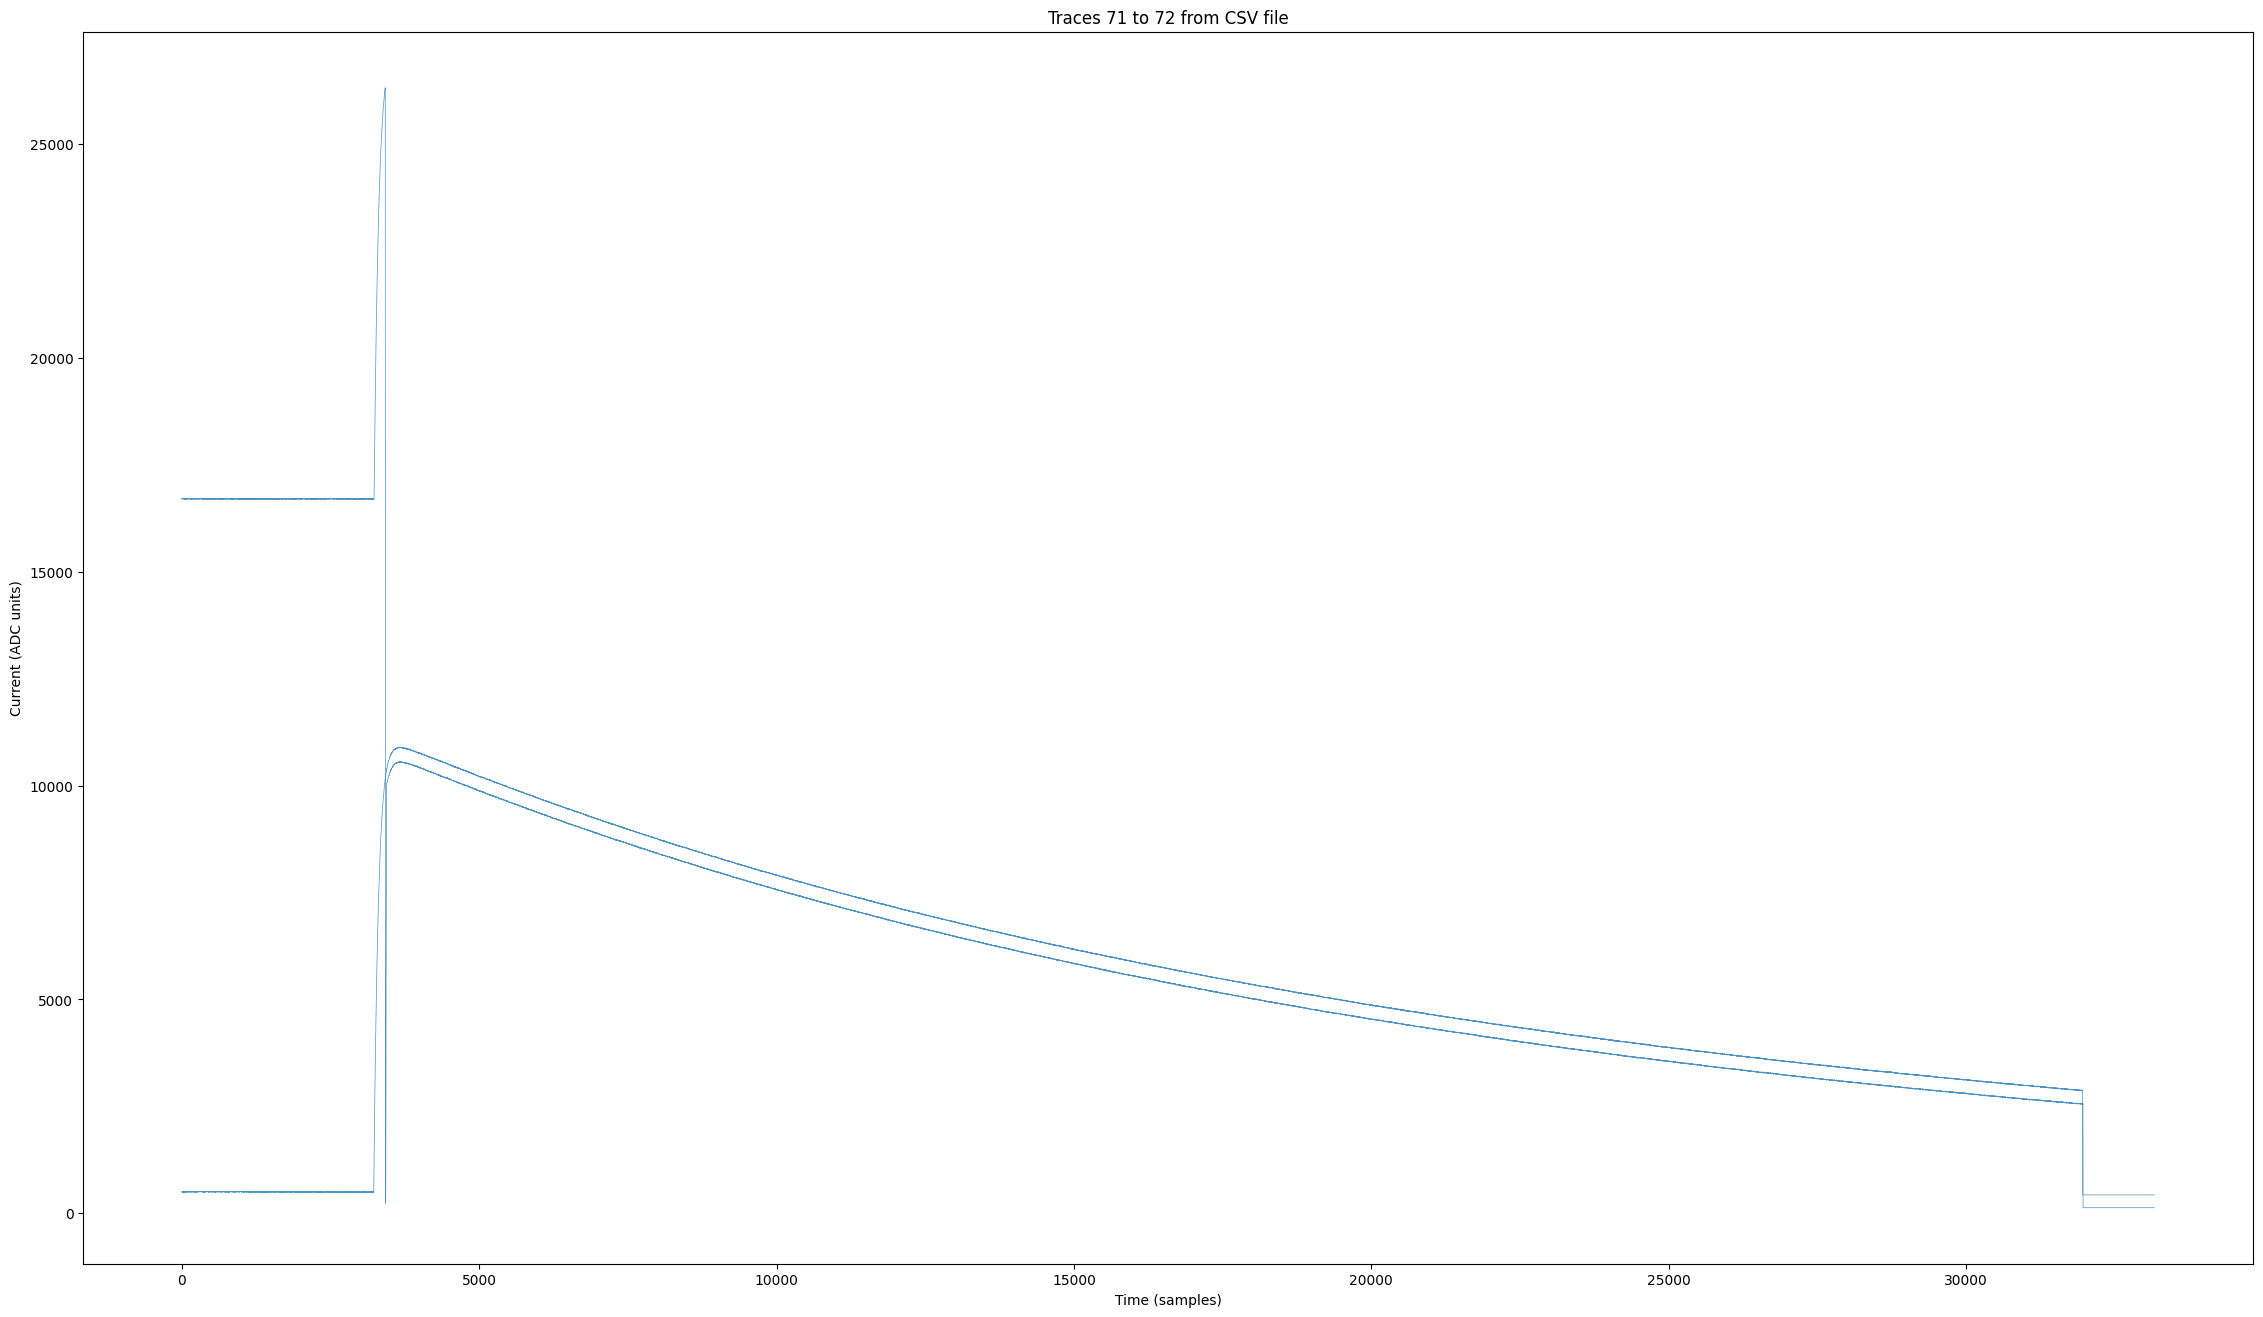

In [35]:
plot_event_traces_from_csv(data_array, start_idx=70, end_idx=72)

In [36]:
filtered_data, offsets = filter_traces(data_array)

In [37]:
filtered_data.shape

(86, 33168)

In [38]:
def plot_histogram_of_max(filtered_traces: np.ndarray):
    """
    Plot a histogram of the highest values from each filtered trace.
    
    Parameters:
    filtered_traces (np.ndarray): 2D array of filtered traces.
    """
    max_values = np.max(filtered_traces, axis=1)
    plt.figure(figsize=(8, 5))
    plt.hist(max_values, bins=20, edgecolor='black')
    plt.xlabel("Maximum Value")
    plt.ylabel("Frequency")
    plt.title("Histogram of Maximum Values of Filtered Traces")
    plt.show()

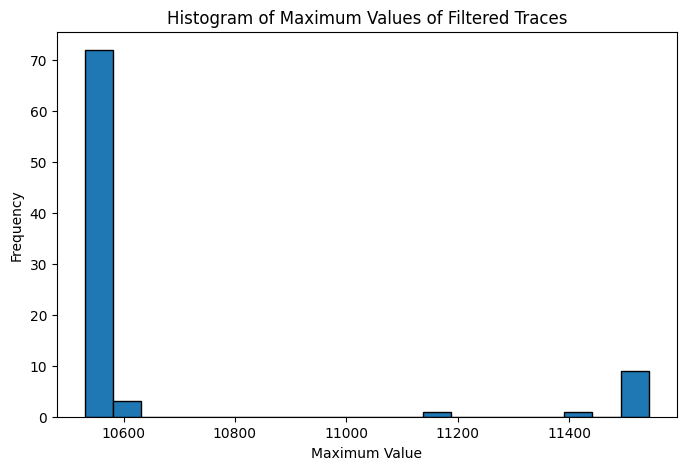

In [39]:
plot_histogram_of_max(filtered_data)

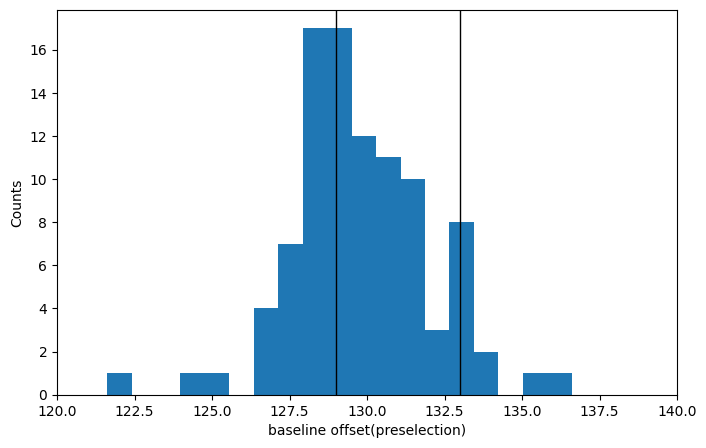

In [40]:
plt.figure(figsize=(8, 5))
plt.hist(offsets, bins=100)
plt.xlabel("baseline offset(preselection)")
plt.xlim(120, 140)
plt.ylabel("Counts")
plt.axvline(x=129, color='black', linestyle='-', linewidth=1)
plt.axvline(x=133, color='black', linestyle='-', linewidth=1)
plt.show()